In [39]:
from math import log
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import scipy.optimize

# Problem 1

The odeint solver requires a callable function representing the right hand side of the IVP. Define the function predator_prey() that accepts the current r(t) and w(t) values as a 1d array y, and the current time t, and returns the right hand side of the predator-prey model as a tuple. Use $\alpha$ = 1.0, $\beta$ = 0.5, $\delta$ = 0.75, and $\gamma$ = 0.25 as your growth parameters.

In [40]:
def predator_prey(y, t):
    """Compute right hand side of Predator-Prey model based on rabbit and
    wolf populations at given time.
    
    Parameters:
        y ((2, ) ndarray): A vector representing rabbit and wolf populations 
            at time t.
        t (float): Current time.
        
    Returns:
        (tuple): A tuple corresponding to right hand side of the Predator-
            Prey model.
    """
    alpha=1 #set the constant values for some reason
    beta=.5
    sigma=.75
    gamma=.25
    return y[0]*(alpha-beta*y[1]),y[1]*(-sigma+gamma*y[0]) #return the predator prey derivative values
    
    

# Problem 2

Use odeint to solve the predator-prey model ODE with initial conditions (r0 , w0 ) = (5, 3) and time ranging from 0 to 20 years. Display the resulting rabbit and wolf populations over time (stored as columns in the output of odeint) on the same plot.

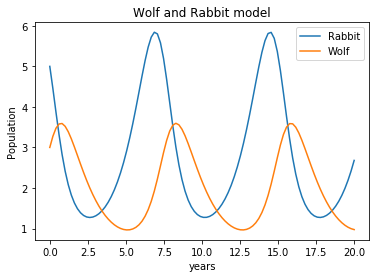

In [41]:
initial = np.array([5,3])
t = np.linspace(0,20,100)

solved = odeint(predator_prey,initial,t)
rabbit = np.array([tag[0] for tag in solved[:]])
wolves = np.array([tag[1] for tag in solved[:]]) #get the values for the solved ODE
plt.plot(t,rabbit)
plt.plot(t,wolves) #plot the values for the rabbit population and wolf population
plt.gca().legend(("Rabbit","Wolf"))
plt.title("Wolf and Rabbit model")
plt.xlabel("years")
plt.ylabel("Population")
plt.show()


# Problem 3

Similar to problem 1, define the function Lotka_volterra() that takes in the current preditor and prey populations as a 1d array y and the current time as a float t and returns the right hand side of the Lotka-Volterra predator-prey model with $\eta$ = 1/3.

Using odeint, solve the IVP with three different initial conditions $y_0 = (1/2, 1/3)$, $y_0 = (1/2, 3/4)$, and $y_0 = (1/16, 3/4)$ and time domain $t = [0, 13]$. Plot these three solutions on the same graph as the phase portrait and the equilibria (0, 0) and (1, 1).

Since your solutions are being plotted with the phase portrait, plot the two populations against eachother (instead of both individually against time).

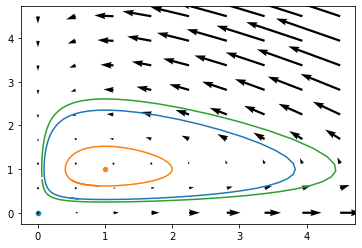

In [42]:
def Lotka_Volterra(y, t):
    """Compute right hand side of Lotka Volterra Predator-Prey model based 
    on rabbit and wolf populations at given time.
    
    Parameters:
        y ((2, ) ndarray): A vector representing rabbit and wolf populations 
            at time t.
        t (float): Current time.
        
    Returns:
        (tuple): A tuple corresponding to right hand side of the Lotka 
            Volterra Predator-Prey model.
    """
    return y[0]*(1-y[1]),(1/3)*y[1]*(y[0]-1) #return the lotka volterra calculations

initial1 = np.array([.5,1/3])
initial2 = np.array([.5,.75])
initial3 = np.array([1/16,3/4])
t = np.linspace(0,13,100)
solve1 = odeint(Lotka_Volterra,initial1,t) #solve the ODEs with different initial conditions
solve2 = odeint(Lotka_Volterra,initial2,t)
solve3 = odeint(Lotka_Volterra,initial3,t)
plt.plot(np.array([tag[0] for tag in solve1[:]]),np.array([tag[1] for tag in solve1[:]])) #plot the ODE results
plt.plot(np.array([tag[0] for tag in solve2[:]]),np.array([tag[1] for tag in solve2[:]]))
plt.plot(np.array([tag[0] for tag in solve3[:]]),np.array([tag[1] for tag in solve3[:]]))
plt.scatter(0,0,s=20)
plt.scatter(1,1,s=20)

# Provided code for plotting phase portrait.
Y1, Y2 = np.meshgrid(np.linspace(0,4.5,25), np.linspace(0,4.5,25))
dU, dV = Lotka_Volterra((Y1, Y2), 0)
Q = plt.quiver(Y1[::3, ::3],Y2[::3, ::3],dU[::3, ::3],dV[::3, ::3])




# Problem 4

Define a new function Logistic_Model() that takes in the current preditor and prey populations y and the current time t and returns the right hand side of the logistic predator-prey model as a tuple.

Use odeint to compute solutions (U, V) of (1.3) for initial conditions (1/3, 1/3) and (1/2, 1/5). Do this for parameter values $\eta$, $\rho$ = 1, 0.3 and also for values $\eta$, $\rho$ = 1, 1.1.

Create a phase portrait for the logistic equations using both sets of parameter values. Plot the direction field, all equilibrium points, and both solution orbits on the same plot for each set of parameter values.

In [43]:
def Logistic_Model(y, t,n=1,ro=.3):
    """Compute right hand side of Logistic Predator-Prey model based on
    rabbit and wolf populations at given time.
    
    Parameters:
        y ((2, ) ndarray): A vector representing rabbit and wolf populations 
            at time t.
        t (float): Current time.
        
    Returns:
        (tuple): A tuple corresponding to right hand side of the Logistic 
            Predator-Prey model.
    """
    return y[0]*(1-y[0]-y[1]),n*y[1]*(y[0]-ro)
initial1 = np.array([1/3,1/3])
initial2 = np.array([1/2,1/5])
t = np.linspace(0,13,100)

#plot the results on two different subplots
plt.subplot(121)
solved1 = odeint(Logistic_Model,initial1,t)
rabbit1 = np.array([tag[0] for tag in solved1[:]])
wolf1 = np.array([tag[1] for tag in solved1[:]])
solved2 = odeint(Logistic_Model,initial2,t)
rabbit2 = np.array([tag[0] for tag in solved2[:]])
wolf2 = np.array([tag[1] for tag in solved2[:]])
plt.plot(rabbit1,wolf1)
plt.plot(rabbit2,wolf2)
plt.scatter(.3,.7)
plt.scatter(1,0)
plt.scatter(0,0) #plot equilibria
Y1, Y2 = np.meshgrid(np.linspace(0,1,25), np.linspace(0,1,25))
dU, dV = Logistic_Model((Y1, Y2), 0)
Q = plt.quiver(Y1[::3, ::3],Y2[::3, ::3],dU[::3, ::3],dV[::3, ::3])

plt.subplot(122)
solved1 = odeint(Logistic_Model,initial1,t,args=(1,1.1))
rabbit1 = np.array([tag[0] for tag in solved1[:]])
wolf1 = np.array([tag[1] for tag in solved1[:]])
solved2 = odeint(Logistic_Model,initial2,t,args=(1,1.1))
rabbit2 = np.array([tag[0] for tag in solved2[:]])
wolf2 = np.array([tag[1] for tag in solved2[:]])
plt.plot(rabbit1,wolf1)
plt.plot(rabbit2,wolf2)

plt.scatter(1,0)
plt.scatter(0,0) #plot the equilibria

Y1, Y2 = np.meshgrid(np.linspace(0,1,25), np.linspace(-.2,.5,25))
dU, dV = Logistic_Model((Y1, Y2), 0,n=1,ro=1.1)
Q = plt.quiver(Y1[::3, ::3],Y2[::3, ::3],dU[::3, ::3],dV[::3, ::3])


# Problem 5

Write the functions forbes() which takes as input F(t) and returns Forbeâ€™s equation. Also write the function energy_balance() which takes as input F (t), L(t), PAL, and EI and returns the energy balance as given in the lab. Use $\rho_F = 9400$, $\rho_L = 1800$, $\gamma_F =3.2$, $\gamma_L =22$, $\eta_F =180$, $\eta_L =230$, $\beta_{AT} =0.14$.


Using forbes() and energy_balance(), define the function weight_odesystem() which takes as input the current fat and lean weights as an array y and the current time as a float t and return the right hand side of the weight change ODE as a tuple.

In [44]:
def forbes(F):
    C = 10.4*(1800/9400)
    return C/(C+F) #returns the value of the forbes equation

def energy_balance(F,L,PAL,EI):
    #K = ((1/PAL)-.14)*EI-F*3.2-L*22
    top = ((1/PAL)-.14)*EI-K-F*3.2-L*22
    bottom = (180/9400)*(1-forbes(F))+(230/1800)*forbes(F)+(1/PAL)
    return top/bottom #returns the value of the energy balance equation

def weight_odesystem(y,t):#creates the ODE using forbes and energy_balance
    return ((1-forbes(y[0]))*energy_balance(y[0],y[1],PAL,EI))/9400,forbes(y[0])*energy_balance(y[0],y[1],PAL,EI)/1800

# Problem 6

Consider the initial value problem corresponing to (1.4).

$\frac{dF}{dt} = \frac{(1âˆ’p(t))EB(t)}{\rho_F}$,

$\frac{dL}{dt} = \frac{p(t)EB(t)}{\rho_L}$,

$F(0) = F_0$, 

$L(0) = L_0$.

The provided function fat_mass() returns the fat mass of an individual based on body weight (kg), age (years), height (meters), and sex. Use this function to define initial conditions $F_0$ and $L_0$ for the IVP above: $F_0 =$ fat_mass($args^*$), $L_0 = BW âˆ’ F_0$.

Suppose a 38 year old female, standing 5â€™8â€ and weighing 160 lbs, reduces her intake from 2143 to 2025 calories/day, and increases her physical activity from little to no exercise (PAL=1.4) to exercising to 2-3 days per week (PAL=1.5).


Use the original intake and phyical activity levels to compute K for this system. Then use odeint to solve the IVP. Graph the solution curve for this single-stage weightloss intervention over a period of 5 years. 


Note the provided code requires quantities in metric units (kilograms, meters, days).

In [45]:
# Provided function.
def fat_mass(BW, age, H, sex):
    BMI = BW / H**2.
    if sex == 'male':
        return BW * (-103.91 + 37.31 * log(BMI) + 0.14 * age) / 100
    else:
        return BW * (-102.01 + 39.96 * log(BMI) + 0.14 * age) / 100
#set the initial conditions
BW = 160/2.205    
F0 = fat_mass((160/2.205),38,1.727,"female")
L0 = BW-F0
PAL = 1.5
EI = 2025
K = ((1/1.4)-.14)*2143-F0*3.2-L0*22
t = np.linspace(0,1825,1825) #set the timeframe as 5 years (in days)
solved = odeint(weight_odesystem,tuple((F0,L0)),t) #solve the ode

fat = np.array([a[0]*2.205 for a in solved[:]])
lean = np.array([a[1]*2.205 for a in solved[:]]) #extract the solutions to the system for fat and lean
total = lean+fat
plt.plot(t,fat)
plt.plot(t,lean)
plt.plot(t,total)
plt.gca().legend(("Fat","Lean","Total"))
plt.ylim(0,180)
plt.plot(t,[166]*1825,"--")
plt.plot(t,[138.4]*1825,"--")
plt.tight_layout()
plt.show()

# Problem 7

Modify the preceding problem to handle a two stage weightloss intervention: Suppose for the first 16 weeks intake is reduced from 2143 to 1600 calories/day and physical activity is increased from little to no exercise (PAL=1.4) to an hour of exercise 5 days per week (PAL=1.7). The following 16 weeks intake is increased from 1600 to 2025 calories/day, and exercise is limited to only 2-3 days per week (PAL=1.5).

You will need to recompute F0, and L0 at the end of the first 16 weeks, but K will stay the same. Find and graph the solution curve over the 32 week period.

In [46]:
BW = 160/2.205    
F0 = fat_mass((160/2.205),38,1.727,"female")
L0 = BW-F0
PAL = 1.7
EI = 1600
K = ((1/1.4)-.14)*2143-F0*3.2-L0*22
t1 = np.linspace(0,112,112)
solved = odeint(weight_odesystem,tuple((F0,L0)),t1)

fat1 = np.array([a[0] for a in solved[:]])
lean1 = np.array([a[1] for a in solved[:]])
total1 = lean1+fat1 #solutions to the first half of the problem
F0 = fat1[-1] #reset the the initial values
L0= lean1[-1]
EI = 2025 #set the amount of calories and activity
PAL = 1.5
t2 = np.linspace(112,224,112)
solved2 = odeint(weight_odesystem,np.array([F0,L0]),t1) #solve the second half of the problem
fat2 = np.array([a[0]*2.205 for a in solved2[:]])
lean2 = np.array([a[1]*2.205 for a in solved2[:]])
total2 = lean2+fat2
plt.plot(t1,fat1*2.205,"b")
plt.plot(t1,lean1*2.205,"r")
plt.plot(t1,total1*2.205,"g")
plt.gca().legend(("Fat","Lean","Total"))
plt.plot(t2,total2,"g")
plt.plot(t2,lean2,"r")
plt.plot(t2,fat2,"b")
plt.ylim(0,180)
plt.tight_layout()
plt.show()
